In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#webからデータを取得するためのモジュール
import requests

#csvデータを扱うモジュール
from io import StringIO

In [4]:
# データのURLです。
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# requestsをつかってデータをtextとして取得します。
source = requests.get(url).text

# StringIOを使ってpandasのエラーを防ぎます。
poll_data = StringIO(source) 

In [12]:
poll_df = pd.read_csv(poll_data)

EmptyDataError: No columns to parse from file

In [13]:
#データの概要
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [14]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [16]:
# ちょっと分かりにくいので、世論調査の主体とその支持政党をまとめて見ます。
poll_df[['Pollster','Partisan','Affiliation']].sort_values('Pollster').drop_duplicates()

,Pollster,Partisan,Affiliation
404,ABC/Post,Nonpartisan,None
471,AP-GfK,Nonpartisan,None
90,ARG,Nonpartisan,None
132,Allstate/National Journal,Nonpartisan,None
305,Angus-Reid,Nonpartisan,None
122,Bloomberg,Nonpartisan,None
63,CBS,Nonpartisan,None
415,CBS/Times,Nonpartisan,None
504,CNN,Nonpartisan,None
568,Clarus,Nonpartisan,None


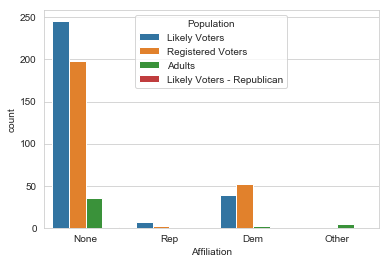

In [18]:
sns.countplot("Affiliation",data=poll_df,hue="Population")

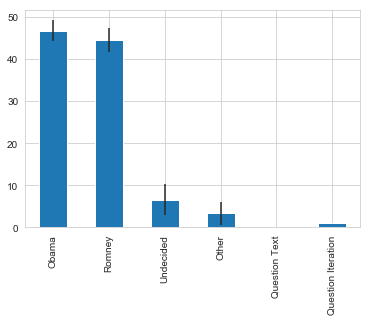

In [33]:
#平均を計算
avg = pd.DataFrame(poll_df.mean())
avg.drop("Number of Observations",axis=0,inplace=True)

#標準偏差を計算
std = pd.DataFrame(poll_df.std())
std.drop("Number of Observations",axis=0,inplace=True)

avg.plot(yerr=std,kind="bar",legend=False)

In [35]:
#平均と標準偏差のdataframeを結合
poll_avg = pd.concat([avg,std],axis=1)

#名前変更
poll_avg.columns = ["Average","STD"]

In [36]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


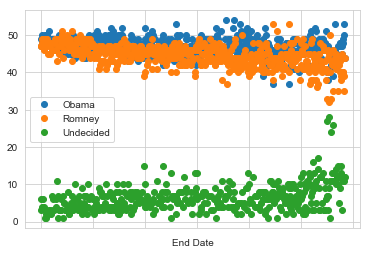

In [37]:
poll_df.plot(x="End Date",y=["Obama","Romney","Undecided"],marker="o",linestyle="")

In [38]:
from datetime import datetime

In [42]:
poll_df["Difference"] = (poll_df.Obama - poll_df.Romney)

In [40]:
poll_df = poll_df.groupby(["Start Date"],as_index=False).mean()

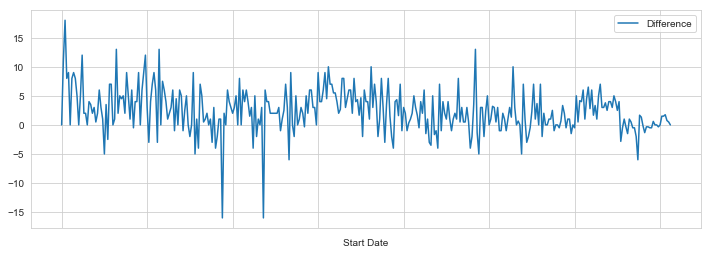

In [44]:
fig = poll_df.plot("Start Date","Difference",figsize=(12,4))

In [45]:
poll_df[poll_df["Start Date"].apply(lambda x:x.startswith("2012-10"))]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
325,2012-10-01,1746.000000,48.500000,46.000000,3.000000,NaN,NaN,1,2.500000
326,2012-10-02,590.000000,49.000000,45.000000,6.000000,NaN,NaN,1,4.000000
327,2012-10-04,1061.500000,45.833333,48.666667,6.000000,NaN,NaN,1,-2.833333
328,2012-10-05,1000.000000,46.000000,46.500000,7.000000,1.000000,NaN,1,-0.500000
329,2012-10-06,895.000000,46.500000,45.500000,4.500000,3.000000,NaN,1,1.000000
330,2012-10-07,1197.333333,47.000000,47.333333,4.666667,1.500000,NaN,1,-0.333333
331,2012-10-08,2030.000000,46.500000,48.000000,5.000000,2.000000,NaN,1,-1.500000
332,2012-10-10,1118.000000,48.000000,47.000000,3.500000,2.000000,NaN,1,1.000000
333,2012-10-11,1335.250000,47.000000,46.500000,5.666667,1.666667,NaN,1,0.500000
334,2012-10-12,1231.500000,46.500000,47.000000,6.500000,NaN,NaN,1,-0.500000


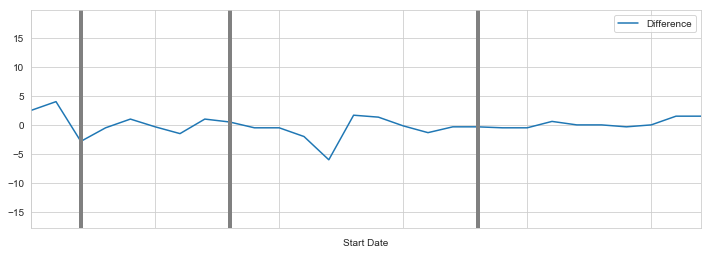

In [50]:
fig = poll_df.plot("Start Date","Difference",figsize=(12,4),xlim=(325,352))
plt.axvline(x=327,linewidth=4,color="gray")
plt.axvline(x=333,linewidth=4,color="gray")
plt.axvline(x=343,linewidth=4,color="gray")

In [51]:
d_df = pd.read_csv("Election_Donor_Data.csv")

/Users/shin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [53]:
d_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [55]:
d_df["contb_receipt_amt"].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [56]:
d_df["contb_receipt_amt"].value_counts().shape

(8079,)

In [59]:
d_mean = d_df["contb_receipt_amt"].mean()
d_std = d_df["contb_receipt_amt"].std()
print("平均{:0.2f},標準偏差{:0.2f}".format(d_mean,d_std))

平均298.24,標準偏差3749.67


In [69]:
top_d = d_df["contb_receipt_amt"].copy()
top_d.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [73]:
top_d = top_d[top_d > 0]
top_d.value_counts().sort_values(ascending = False)

100.00     178188
50.00      137584
25.00      110345
250.00      91182
500.00      57984
2500.00     49005
35.00       37237
1000.00     36494
10.00       33986
200.00      27813
20.00       17565
15.00       16163
150.00      14600
75.00       13647
201.20      11718
30.00       11381
300.00      11204
20.12        9897
5.00         9024
40.00        5007
2000.00      4128
55.00        3760
1500.00      3705
3.00         3383
60.00        3084
400.00       3066
110.00       2554
125.00       2520
19.00        2474
112.00       2457
            ...  
81.18           1
142.41          1
190.50          1
95.29           1
130.80          1
309.10          1
341.50          1
247.68          1
98.12           1
57.10           1
95.32           1
146.41          1
106.99          1
146.66          1
1653.00         1
131.20          1
28.88           1
20.17           1
1666.00         1
1687.00         1
111.88          1
95.54           1
23.99           1
44.82           1
36.36     

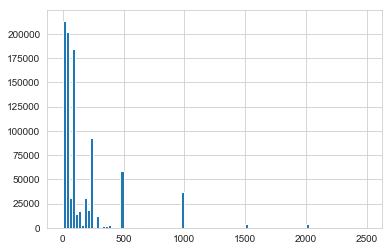

In [74]:
com_don = top_d[top_d < 2500]
com_don.hist(bins=100)

In [75]:
can = d_df.cand_nm.unique()

In [76]:
can

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [78]:
# 所属政党の辞書です。
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# 以下のコードで、DataFrame全体を更新できます。
d_df['Party'] = d_df.cand_nm.map(party_map)

In [79]:
d_df = d_df[d_df.contb_receipt_amt > 0]

In [80]:
d_df.groupby("cand_nm")["contb_receipt_amt"].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [81]:
d_df.groupby("cand_nm")["contb_receipt_amt"].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [82]:
can_amount = d_df.groupby("cand_nm")["contb_receipt_amt"].sum()

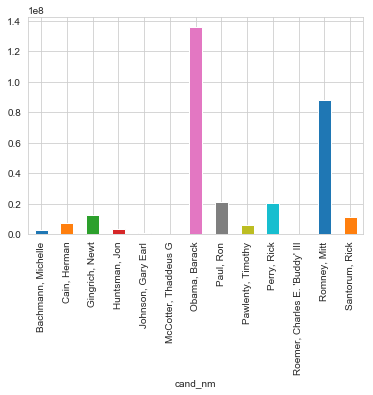

In [84]:
can_amount.plot(kind="bar")

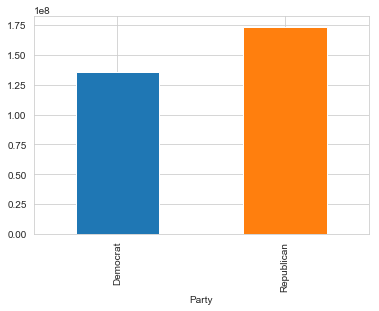

In [85]:
d_df.groupby("Party")["contb_receipt_amt"].sum().plot(kind="bar")

In [86]:
o_df = d_df.pivot_table("contb_receipt_amt",
                       index = "contbr_occupation",
                       columns = "Party", aggfunc="sum")

In [87]:
o_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [89]:
o_df.shape

(45067, 2)

In [95]:
o_df = o_df[o_df.sum(1) > 1000000]
o_df.shape

(31, 2)

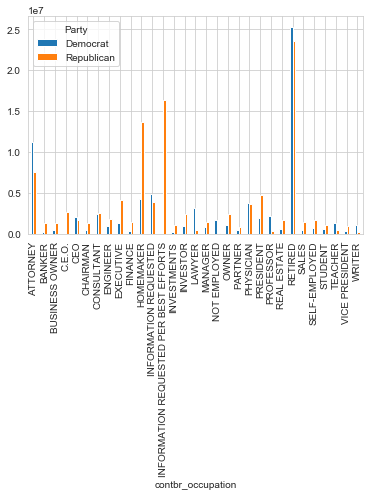

In [97]:
o_df.plot(kind="bar")

In [98]:
o_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


In [102]:
o_df.drop(["INFORMATION REQUESTED PER BEST EFFORTS","INFORMATION REQUESTED"],axis=0,inplace=True)

In [104]:
o_df.loc["CEO"] = o_df.loc["CEO"] + o_df.loc["C.E.O."]
o_df.drop("C.E.O.")

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
CEO,2074974.79,4.211041e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
FINANCE,296031.40,1.402515e+06


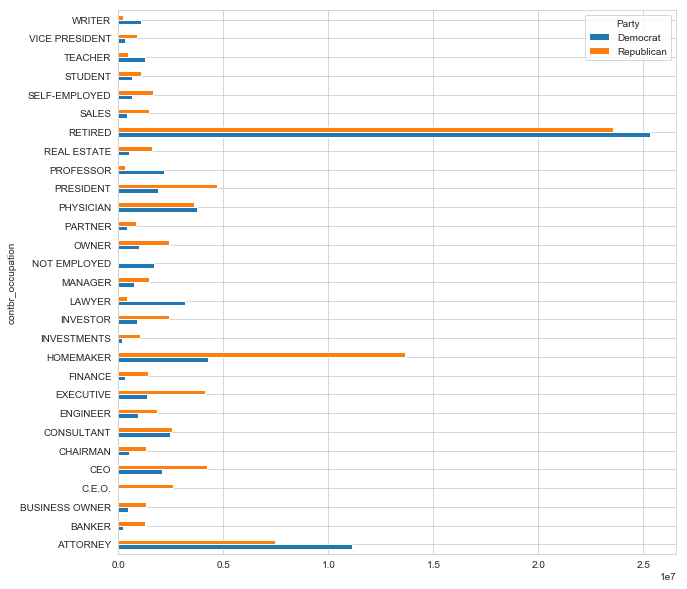

In [107]:
o_df.plot(kind="barh",figsize=(10,10))